In [1]:
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.checkpoint.memory import MemorySaver

In [2]:
load_dotenv()

True

In [3]:
model=ChatOpenAI()

In [4]:
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]


In [5]:
graph=StateGraph(ChatState)

In [6]:
def chat_node(state:ChatState):
    prompt=f"""
answer to the user query {state['messages']}
"""
    response=model.invoke(prompt).content
    return {'messages':[response]}

In [7]:
checkpointer=MemorySaver()

In [8]:
graph.add_node("Chot_node", chat_node)

graph.add_edge(START,'Chot_node')
graph.add_edge('Chot_node',END)

workflow=graph.compile(checkpointer=checkpointer)


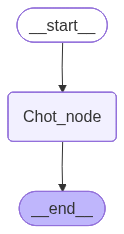

In [9]:
workflow

In [10]:
inital_state={'messages':[HumanMessage(content="Wat is your name")]}
final_state=workflow.invoke(inital_state)
final_state

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [ ]:
thread_id=1

while True:

    user= input("Type your query: ")
    print("User Message: ", user)
    if user.strip().lower() in ['exit','bye','quit']:
        break
    else:
        config={'configurable':{'thread_id':thread_id}}
        response=workflow.invoke({'messages':[HumanMessage(content=user)]}, config=config)
        print("AI Message: ",response['messages'][-1].content)

User Message:  
AI Message:  Hello! How can I assist you today?
User Message:  my name is shubham
AI Message:  Hello Shubham! How can I assist you today?
